# Loan default detection using Neural network

## Our Goal

- A model can predict wether or not a borrower will pay back his/her loan. The model is trained with a given historical data that has information on whether or not the borrowers defaulted. The model can be used in the future to assess if a new customer is likely to pay back the loan. 

## Method
- A deep neural network is used to address the problem. Since the data is imbalanced, it will be resampled (both under-sampled and over-sampled) to get better results of prediction. A random forest model is also performed for a comparison.  

## Results
- A deep neural network with a early stop method and Dropout shows a good performance.
- Resampling the imbalanced data helps to improve the prediction on the minor class (class with a small number of observations). 
- A random forest model also performs well in this imbalanced dataset. However it underperforms the newral network trained by resampled data.

## Work flow
- First, exploratory data analysis
- Handle the missing data
- Feature engineering
- Data prepossessing
- Train and evaluate a deep neural network
- Tune the model with resampled data
- Train a random forest model for a comparison.

In [1]:
# import libaraies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)

In [228]:
# check information (explanation) of the data columns
df_schemma = pd.read_csv('../DATA/lending_club_info.csv')
df_schemma

,LoanStatNew,Description
0,loan_amnt,The listed amount of the loan applied for by t...
1,term,The number of payments on the loan. Values are...
2,int_rate,Interest Rate on the loan
3,installment,The monthly payment owed by the borrower if th...
4,grade,LC assigned loan grade
5,sub_grade,LC assigned loan subgrade
6,emp_title,The job title supplied by the Borrower when ap...
7,emp_length,Employment length in years. Possible values ar...
8,home_ownership,The home ownership status provided by the borr...
9,annual_inc,The self-reported annual income provided by th...


In [4]:
# load the data
df = pd.read_csv('../DATA/lending_club_loan_two.csv')
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


# Exploratory data analysis and handling the missing values

In [5]:
# get the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

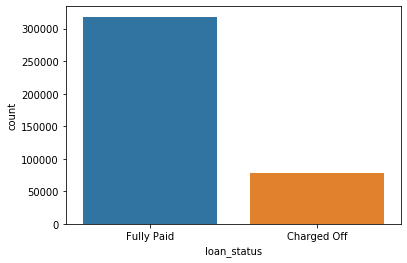

In [6]:
# check the class distribution
sns.countplot(x='loan_status',data = df)

In [7]:
# check for missing value
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

### 'emp_title' column

In [8]:
df['emp_title'].nunique()

173105

- The 'emp_title' column has high number of unique values. It's hard to use one-hot encoding. We'll drop the column. 

In [9]:
df = df.drop('emp_title', axis = 1)

### 'emp_length' column
- We will check if emp_length features will affect the outcome.

In [10]:
df['emp_length'].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

- Extract the number from the strings. 

In [11]:
df['emp_length'] = df['emp_length'].str.extract('(\d+)').astype(float)

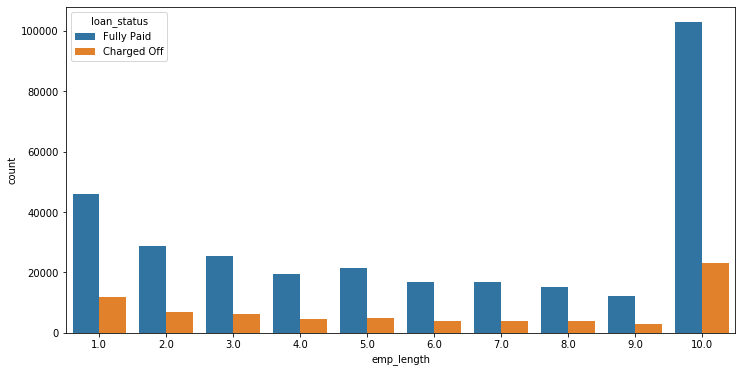

In [12]:
fig = plt.figure(figsize=(12,6))
sns.countplot(x='emp_length',data = df, hue = 'loan_status')

In [13]:
emp_fully_paid = df[df['loan_status'] == 'Fully Paid'].groupby('emp_length')['loan_status'].count()
emp_charged_off = df[df['loan_status'] == 'Charged Off'].groupby('emp_length')['loan_status'].count()

In [14]:
# Percentage of 'charged off'  of each 'emp_length' group
emp_charged_off/(emp_fully_paid + emp_charged_off)

emp_length
1.0     0.203395
2.0     0.193262
3.0     0.195231
4.0     0.192385
5.0     0.192187
6.0     0.189194
7.0     0.194774
8.0     0.199760
9.0     0.200470
10.0    0.184186
Name: loan_status, dtype: float64

- we get almost the same percentage for all the 'emp_length' groups. So the features might not affect the outcome. we will drop the feature.

In [15]:
df = df.drop('emp_length',axis = 1)

### 'title' column

In [16]:
df['title'].value_counts().sort_values(ascending = False)[0:30]

Debt consolidation           152472
Credit card refinancing       51487
Home improvement              15264
Other                         12930
Debt Consolidation            11608
Major purchase                 4769
Consolidation                  3852
debt consolidation             3547
Business                       2949
Debt Consolidation Loan        2864
Medical expenses               2742
Car financing                  2139
Credit Card Consolidation      1775
Vacation                       1717
Moving and relocation          1689
consolidation                  1595
Personal Loan                  1591
Consolidation Loan             1299
Home Improvement               1268
Home buying                    1183
Credit Card Refinance          1094
Credit Card Payoff             1052
Consolidate                     919
Personal                        858
Loan                            751
Credit Card Loan                627
Freedom                         579
consolidate                 

- Drop the column

In [17]:
df = df.drop('title', axis = 1)

### 'revol_util' column

In [18]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [19]:
df_schemma[df_schemma['LoanStatNew']=='revol_util']['Description']

22    Revolving line utilization rate, or the amount...
Name: Description, dtype: object

In [20]:
df['revol_util'].unique()

array([ 41.8 ,  53.3 ,  92.2 , ...,  56.26, 111.4 , 128.1 ])

- Fill in the missing values with mean. 

In [21]:
mean_revol_util = df['revol_util'].mean()
df['revol_util'] = df['revol_util'].fillna(mean_revol_util)

In [22]:
df['revol_util'].isnull().sum()

0

### 'mort_acc' column

In [23]:
df['mort_acc'].unique()

array([ 0.,  3.,  1.,  4.,  2.,  6.,  5., nan, 10.,  7., 12., 11.,  8.,
        9., 13., 14., 22., 34., 15., 25., 19., 16., 17., 32., 18., 24.,
       21., 20., 31., 28., 30., 23., 26., 27.])

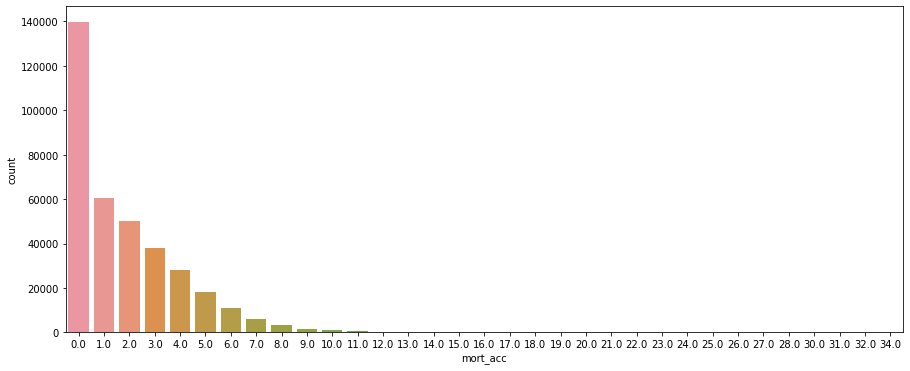

In [24]:
fig = plt.figure(figsize=(15,6))
sns.countplot(x='mort_acc',data=df)

- Fill in the missing values with mode. 

In [25]:
mode_mort_acc = df['mort_acc'].mode()[0]
df['mort_acc'] = df['mort_acc'].fillna(mode_mort_acc)

In [26]:
df['mort_acc'].isnull().sum()

0

### 'pub_rec_bankruptcies' column

In [27]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util                0
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
dtype: int64

In [28]:
df['pub_rec_bankruptcies']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
396025    0.0
396026    0.0
396027    0.0
396028    0.0
396029    0.0
Name: pub_rec_bankruptcies, Length: 396030, dtype: float64

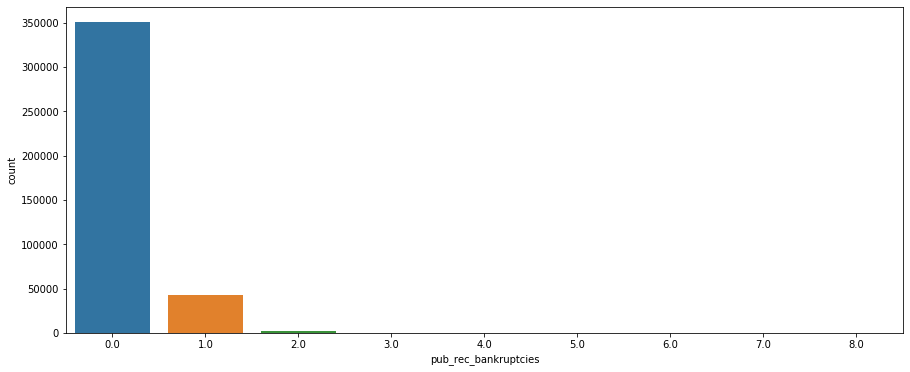

In [29]:
fig = plt.figure(figsize=(15,6))
sns.countplot(x='pub_rec_bankruptcies',data=df)

- Fill in the missing values with mode. 

In [30]:
mode_pub_rec_bankruptcies = df['pub_rec_bankruptcies'].mode()[0]
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].fillna(mode_pub_rec_bankruptcies)

In [31]:
df['pub_rec_bankruptcies'].isnull().sum()

0

# Feature engineering

In [32]:
# create a copy of the dataframe
df_fea = df.copy()

## 'term' column
- Extract the number from the objects

In [33]:
df_fea['term'] = df_fea['term'].apply(lambda x: str(x).split()[0])
df_fea['term'] = df_fea['term'].astype(float)
df_fea['term']

0         36.0
1         36.0
2         36.0
3         36.0
4         60.0
          ... 
396025    60.0
396026    36.0
396027    36.0
396028    60.0
396029    36.0
Name: term, Length: 396030, dtype: float64

## 'grade' column
- Using one-hot encoding for the column 

In [34]:
df_fea['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [35]:
dummy_grade = pd.get_dummies(df_fea['grade'])

dummy_columns = dummy_grade.columns
dummy_columns

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype='object')

In [36]:
df_fea[['grade_A', 'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G']] = dummy_grade
df_fea.head(2)

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G
0,10000.0,36.0,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",0,1,0,0,0,0,0
1,8000.0,36.0,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",0,1,0,0,0,0,0


In [37]:
# drop the 'grade' column 
df_fea = df_fea.drop('grade',axis = 1)

## 'sub_grade' column

In [38]:
df_fea['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

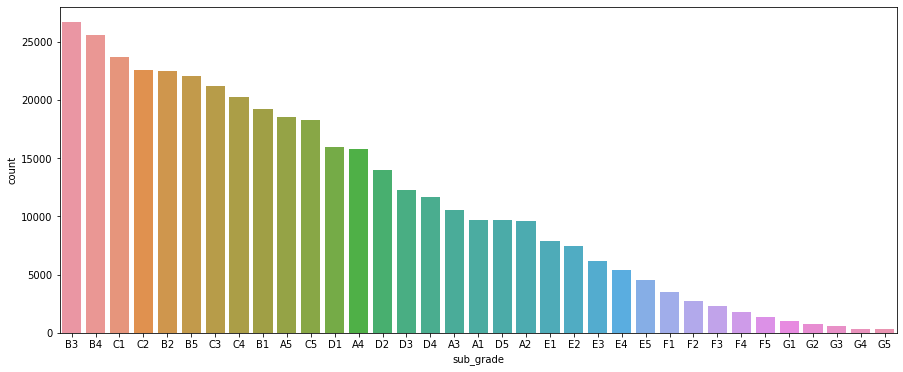

In [39]:
fig = plt.figure(figsize=(15,6))
sns.countplot(x='sub_grade',data = df_fea, order = df_fea['sub_grade'].value_counts().index)

- Map the column values with a numerical grade A1 =  1, A2 = 2, ..., G5 = 35.

In [40]:
# Map the column values with a numerical grade A1: 1, A2: 2, ...G5 = 35
map_values = {'B4':9, 'B5':10, 'B3':8, 'A2':2, 'C5':15, 'C3':13, 'A1':1, 'B2':7, 'C1':11, 'A5':5, 'E4':24,
       'A4':4, 'A3':3, 'D1':16, 'C2':12, 'B1':6, 'D3':18, 'D5':20, 'D2':17, 'E1':21, 'E2':22, 'E5':25,
       'F4':29, 'E3':23, 'D4':19, 'G1':31, 'F5':30, 'G2':32, 'C4':14, 'F1':26, 'F3':28, 'G5':35, 'G4':34,
       'F2':27, 'G3':33}

In [41]:
df_fea['sub_grade'] = df_fea['sub_grade'].map(map_values)

In [42]:
df_fea['sub_grade'].nunique()

35

In [43]:
# drop the 'sub_grade' column 
df_fea = df_fea.drop('sub_grade',axis = 1)

## 'home_ownership' column

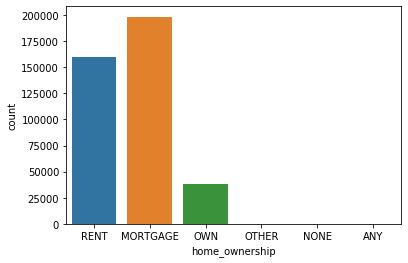

In [44]:
sns.countplot(data=df_fea, x = 'home_ownership')
#df_fea['home_ownership'].plot(x= kind='bar')

In [45]:
df_fea['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

In [46]:
df_fea['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'NONE', 'ANY'], dtype=object)

- we combine 'OTHER', 'NONE', and 'ANY' and call them 'OTHER'

In [47]:
inds = df[df['home_ownership']=='ANY'].index
for ind in inds:
   df_fea.loc[ind,'home_ownership'] = 'OTHER'

In [48]:
inds = df[df['home_ownership']=='NONE'].index
for ind in inds:
   df_fea.loc[ind,'home_ownership'] = 'OTHER'

In [49]:
df_fea['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: home_ownership, dtype: int64

- Using one-hot encoding for this column

In [50]:
dummy_home = pd.get_dummies(df_fea['home_ownership'])

dummy_columns = dummy_home.columns
dummy_columns

Index(['MORTGAGE', 'OTHER', 'OWN', 'RENT'], dtype='object')

In [51]:
df_fea[['home_MORTGAGE', 'home_OTHER', 'home_OWN', 'home_RENT']] = dummy_home

In [52]:
df_fea.head(2)

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_MORTGAGE,home_OTHER,home_OWN,home_RENT
0,10000.0,36.0,11.44,329.48,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",0,1,0,0,0,0,0,0,0,0,1
1,8000.0,36.0,11.99,265.68,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",0,1,0,0,0,0,0,1,0,0,0


In [53]:
# drop 'homw_ownership' 
df_fea = df_fea.drop('home_ownership',axis = 1)

In [54]:
df_fea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 32 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  float64
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   annual_inc            396030 non-null  float64
 5   verification_status   396030 non-null  object 
 6   issue_d               396030 non-null  object 
 7   loan_status           396030 non-null  object 
 8   purpose               396030 non-null  object 
 9   dti                   396030 non-null  float64
 10  earliest_cr_line      396030 non-null  object 
 11  open_acc              396030 non-null  float64
 12  pub_rec               396030 non-null  float64
 13  revol_bal             396030 non-null  float64
 14  revol_util            396030 non-null  float64
 15  

### 'verification_status' column

In [55]:
df_fea['verification_status'].unique()

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

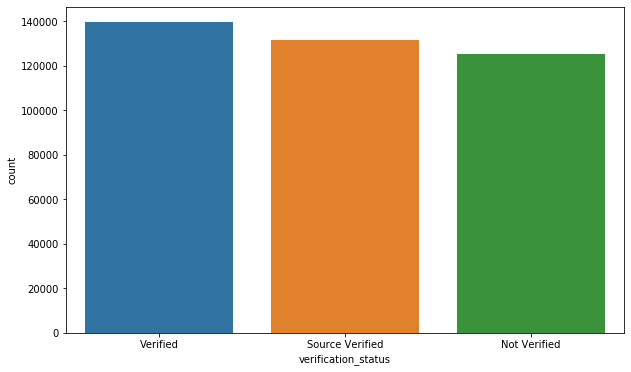

In [56]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x='verification_status',data = df_fea, order = df_fea['verification_status'].value_counts().index)

In [57]:
dummy_verified = pd.get_dummies(df_fea['verification_status'])

dummy_columns = dummy_verified.columns
dummy_columns

Index(['Not Verified', 'Source Verified', 'Verified'], dtype='object')

In [58]:
df_fea[['verfied_Not_Verified', 'verfied_Source_Verified', 'verfied_Verified']] = dummy_verified

In [59]:
# drop the 'verification_status' column
df_fea = df_fea.drop('verification_status',axis = 1)

### 'issue_d' column
- If we train a model to predict if a new customer can paid the loan, there will no information for the feature. we will drop this column.

In [60]:
df_schemma[df_schemma['LoanStatNew'] == 'issue_d']['Description']

11    The month which the loan was funded
Name: Description, dtype: object

In [61]:
# drop the 'issue_d' column
df_fea = df_fea.drop('issue_d',axis = 1)

### 'purpose' column

In [62]:
df_fea['purpose'].nunique()

14

In [63]:
df_fea['purpose'].value_counts().sort_values()

educational              257
renewable_energy         329
wedding                 1812
house                   2201
vacation                2452
moving                  2854
medical                 4196
car                     4697
small_business          5701
major_purchase          8790
other                  21185
home_improvement       24030
credit_card            83019
debt_consolidation    234507
Name: purpose, dtype: int64

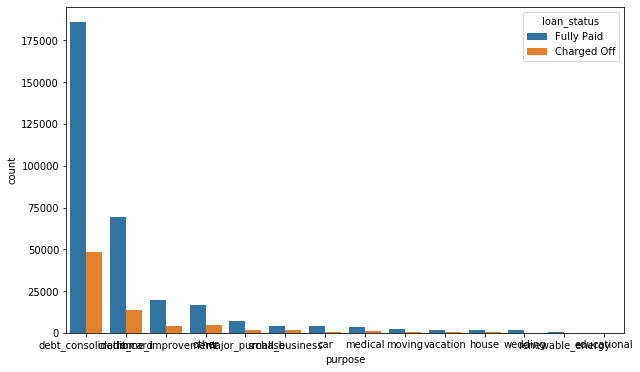

In [64]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x='purpose',data = df_fea,hue = 'loan_status',order = df_fea['purpose'].value_counts().index)

In [65]:
# Use one-hot encoding
dummy_purpose = pd.get_dummies(df_fea['purpose'])

dummy_columns = dummy_purpose.columns
dummy_columns

Index(['car', 'credit_card', 'debt_consolidation', 'educational',
       'home_improvement', 'house', 'major_purchase', 'medical', 'moving',
       'other', 'renewable_energy', 'small_business', 'vacation', 'wedding'],
      dtype='object')

In [66]:
df_fea = pd.concat([df_fea,dummy_purpose],axis = 1)

In [67]:
df_fea.head(2)

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_MORTGAGE,home_OTHER,home_OWN,home_RENT,verfied_Not_Verified,verfied_Source_Verified,verfied_Verified,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,10000.0,36.0,11.44,329.48,117000.0,Fully Paid,vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,8000.0,36.0,11.99,265.68,65000.0,Fully Paid,debt_consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [68]:
# drop the column for now
df_fea = df_fea.drop('purpose',axis = 1)

### 'earliest_cr_line' column
- Calculate years from  the 'earliest_cr_line' to the current year

In [69]:
df_fea['earliest_cr_line'] = pd.to_datetime(df_fea['earliest_cr_line'])

In [70]:
from datetime import datetime
df_fea['earliest_cr_line_year'] = datetime.now().year - df_fea['earliest_cr_line'].dt.year

In [71]:
# drop ''earliest_year'' column
df_fea=df_fea.drop('earliest_cr_line',axis = 1)

### 'initial_list_status' column
we use one-hot encoding for the column

In [72]:
df_fea['initial_list_status'].unique()

array(['w', 'f'], dtype=object)

In [73]:
dummy_ini_status = pd.get_dummies(df_fea['initial_list_status'])

dummy_columns = dummy_ini_status.columns
dummy_columns

Index(['f', 'w'], dtype='object')

In [74]:
df_fea[['ini_status_f', 'ini_status_w']] = dummy_ini_status

In [75]:
# drop the 'initial_list_status' column column
df_fea = df_fea.drop('initial_list_status',axis = 1)

### 'application_type' column
we use one-hot encoding for the column

In [76]:
df_fea['application_type'].unique()

array(['INDIVIDUAL', 'JOINT', 'DIRECT_PAY'], dtype=object)

In [77]:
dummy_app_type = pd.get_dummies(df_fea['application_type'])

df_fea[['type_INDIVIDUAL', 'type_JOINT', 'type_DIRECT_PAY']] = dummy_app_type

In [78]:
# drop the 'application_type' column column
df_fea = df_fea.drop('application_type',axis = 1)

### 'address' column
- Extrac the zipcode and then get dummy

In [79]:
df['address']

0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
                                ...                        
396025       12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA...
396027     953 Matthew Points Suite 414\nReedfort, NY 70466
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
396029          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 396030, dtype: object

In [80]:
df_fea['zip_code'] = df['address'].apply(lambda x: x[-5:])
df_fea['zip_code'].unique()

array(['22690', '05113', '00813', '11650', '30723', '70466', '29597',
       '48052', '86630', '93700'], dtype=object)

In [81]:
dummy_zip_code = pd.get_dummies(df_fea['zip_code'])
df_fea[['zip_code_22690', 'zip_code_05113', 'zip_code_00813', 'zip_code_11650', 'zip_code_30723', 'zip_code_70466', 'zip_code_29597',
       'zip_code_48052', 'zip_code_86630', 'zip_code_93700']] = dummy_zip_code 

In [82]:
# drop it for now
df_fea = df_fea.drop('address',axis = 1)

In [83]:
# drop it for now
df_fea = df_fea.drop('zip_code',axis = 1)

### Target (loan_status) column


In [84]:
df_fea['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [85]:
map_target = {'Fully Paid':1, 'Charged Off':0}
df_fea['loan_status'] = df_fea['loan_status'].map(map_target)

In [86]:
df_fea['loan_status'].unique()

array([1, 0])

In [87]:
df_fea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 58 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   loan_amnt                396030 non-null  float64
 1   term                     396030 non-null  float64
 2   int_rate                 396030 non-null  float64
 3   installment              396030 non-null  float64
 4   annual_inc               396030 non-null  float64
 5   loan_status              396030 non-null  int64  
 6   dti                      396030 non-null  float64
 7   open_acc                 396030 non-null  float64
 8   pub_rec                  396030 non-null  float64
 9   revol_bal                396030 non-null  float64
 10  revol_util               396030 non-null  float64
 11  total_acc                396030 non-null  float64
 12  mort_acc                 396030 non-null  float64
 13  pub_rec_bankruptcies     396030 non-null  float64
 14  grad

Print cross correlation for the 'loan_status'

In [88]:
df_fea.corr()['loan_status'].sort_values()

zip_code_00813            -0.345792
zip_code_93700            -0.344601
zip_code_86630            -0.341889
int_rate                  -0.247758
term                      -0.173246
grade_E                   -0.131385
grade_F                   -0.102158
grade_D                   -0.101877
revol_util                -0.082341
home_RENT                 -0.063160
grade_G                   -0.062667
dti                       -0.062413
loan_amnt                 -0.059836
verfied_Verified          -0.050314
installment               -0.041082
debt_consolidation        -0.034244
verfied_Source_Verified   -0.033030
small_business            -0.029944
open_acc                  -0.028012
grade_C                   -0.023871
pub_rec                   -0.019933
type_INDIVIDUAL           -0.010867
other                     -0.009609
ini_status_w              -0.009489
pub_rec_bankruptcies      -0.009416
home_OWN                  -0.008726
moving                    -0.008289
medical                   -0

# Modelling

## Data preparation

In [89]:
# Try with a random 10% of rows
#data = df_fea.sample(frac = 0.1)

In [90]:
# Try with all rows
data = df_fea.copy()

In [91]:
data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc',
       'loan_status', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'grade_A', 'grade_B',
       'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G', 'home_MORTGAGE',
       'home_OTHER', 'home_OWN', 'home_RENT', 'verfied_Not_Verified',
       'verfied_Source_Verified', 'verfied_Verified', 'car', 'credit_card',
       'debt_consolidation', 'educational', 'home_improvement', 'house',
       'major_purchase', 'medical', 'moving', 'other', 'renewable_energy',
       'small_business', 'vacation', 'wedding', 'earliest_cr_line_year',
       'ini_status_f', 'ini_status_w', 'type_INDIVIDUAL', 'type_JOINT',
       'type_DIRECT_PAY', 'zip_code_22690', 'zip_code_05113', 'zip_code_00813',
       'zip_code_11650', 'zip_code_30723', 'zip_code_70466', 'zip_code_29597',
       'zip_code_48052', 'zip_code_86630', 'zip_code_93700'],
      dtype='object')

### spliting train, test data

In [229]:
data.head(2)

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_MORTGAGE,home_OTHER,home_OWN,home_RENT,verfied_Not_Verified,verfied_Source_Verified,verfied_Verified,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,earliest_cr_line_year,ini_status_f,ini_status_w,type_INDIVIDUAL,type_JOINT,type_DIRECT_PAY,zip_code_22690,zip_code_05113,zip_code_00813,zip_code_11650,zip_code_30723,zip_code_70466,zip_code_29597,zip_code_48052,zip_code_86630,zip_code_93700
0,10000.0,36.0,11.44,329.48,117000.0,1,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,30,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
1,8000.0,36.0,11.99,265.68,65000.0,1,22.05,17.0,0.0,20131.0,53.3,27.0,3.0,0.0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,16,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0


In [97]:
X = data.drop('loan_status',axis = 1).values
y = data['loan_status'].values

In [98]:
# Normalize the data, we normalize the data

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [111]:
X.shape

(396030, 57)

In [100]:
# Normalize
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Train a neural network model

### Train the model and using early stopping and Dropout

In [105]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [101]:
# create an earlystopping
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [106]:
# Create a model with Dropout

model = Sequential()

model.add(Dense(units = 57, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 28, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 14, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

# Train the model 
model.fit(X_train,y_train,
         epochs = 50,
         validation_data=(X_test, y_test), verbose=1,
         callbacks=[early_stop])

Epoch 1/50
8292/8292 [==============================] - 14s 2ms/step - loss: 0.2971 - val_loss: 0.2633
Epoch 2/50
8292/8292 [==============================] - 15s 2ms/step - loss: 0.2687 - val_loss: 0.2635
Epoch 3/50
8292/8292 [==============================] - 16s 2ms/step - loss: 0.2680 - val_loss: 0.2632
Epoch 4/50
8292/8292 [==============================] - 19s 2ms/step - loss: 0.2679 - val_loss: 0.2635
Epoch 5/50
8292/8292 [==============================] - 17s 2ms/step - loss: 0.2673 - val_loss: 0.2628
Epoch 6/50
8292/8292 [==============================] - 20s 2ms/step - loss: 0.2670 - val_loss: 0.2623
Epoch 7/50
8292/8292 [==============================] - 24s 3ms/step - loss: 0.2670 - val_loss: 0.2641
Epoch 8/50
8292/8292 [==============================] - 17s 2ms/step - loss: 0.2666 - val_loss: 0.2631
Epoch 9/50
8292/8292 [==============================] - 20s 2ms/step - loss: 0.2666 - val_loss: 0.2621
Epoch 10/50
8292/8292 [==============================] - 15s 2ms/step - l

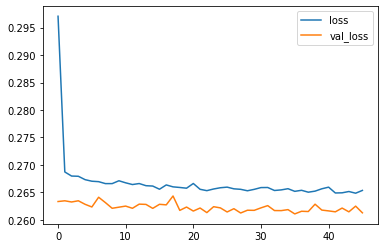

In [107]:
# Plot the loss of the model
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

## Predict and evaluate the model

In [108]:
y_pred = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [230]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve

In [110]:
print(classification_report(y_test,y_pred))
print()
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60     25739
           1       0.88      1.00      0.93    104951

    accuracy                           0.89    130690
   macro avg       0.94      0.71      0.77    130690
weighted avg       0.90      0.89      0.87    130690


[[ 11036  14703]
 [     0 104951]]


## Try resampling techique

### Undersample the majority

In [142]:
from sklearn.utils import resample
import numpy as np

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Normalize
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [190]:
y_train_re=y_train.reshape(265340,1)

In [191]:
# Concatenate X_train and y_train 
sampled = np.concatenate((X_train,y_train_re),axis = 1)

In [192]:
sample_fully_paid = sampled[y_train==1]
sample_charged_off = sampled[y_train==0]

In [193]:
sample_fully_paid_downsampled = resample(sample_fully_paid,
                                replace = False, # sample without replacement
                                n_samples = len(sample_charged_off), # match minority n
                                random_state = 27) # reproducible results

In [196]:
# re-concatenate the sample
sampled = np.concatenate((sample_fully_paid_downsampled,sample_charged_off),axis = 0)

In [198]:
# re-create the train set
X_train = sampled[:,0:(sampled.shape[1]-1)]
y_train = sampled[:,-1]

In [200]:
# recreate a model

model = Sequential()

model.add(Dense(units = 57, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 28, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 14, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

# retrain the model 
model.fit(X_train,y_train,
         epochs = 50,
         validation_data=(X_test, y_test), verbose=1,
         callbacks=[early_stop])

Epoch 1/50
3246/3246 [==============================] - 35s 11ms/step - loss: 0.4462 - val_loss: 0.3649
Epoch 2/50
3246/3246 [==============================] - 35s 11ms/step - loss: 0.3799 - val_loss: 0.3721
Epoch 3/50
3246/3246 [==============================] - 34s 10ms/step - loss: 0.3762 - val_loss: 0.3552
Epoch 4/50
3246/3246 [==============================] - 37s 11ms/step - loss: 0.3742 - val_loss: 0.3647
Epoch 5/50
3246/3246 [==============================] - 39s 12ms/step - loss: 0.3735 - val_loss: 0.3687
Epoch 6/50
3246/3246 [==============================] - 40s 12ms/step - loss: 0.3723 - val_loss: 0.3604
Epoch 7/50
3246/3246 [==============================] - 43s 13ms/step - loss: 0.3730 - val_loss: 0.3700
Epoch 8/50
3246/3246 [==============================] - 39s 12ms/step - loss: 0.3712 - val_loss: 0.3585
Epoch 9/50
3246/3246 [==============================] - 43s 13ms/step - loss: 0.3712 - val_loss: 0.3528
Epoch 10/50
3246/3246 [==============================] - 48s 15m

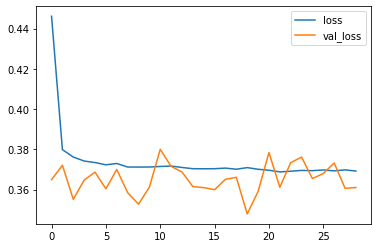

In [201]:
# Plot the loss of the model
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [202]:
y_pred_resample = model.predict_classes(X_test)

In [203]:
# evaluate the model
print(classification_report(y_test,y_pred_resample))
print()
print(confusion_matrix(y_test,y_pred_resample))

              precision    recall  f1-score   support

           0       0.48      0.81      0.60     25739
           1       0.94      0.78      0.86    104951

    accuracy                           0.79    130690
   macro avg       0.71      0.80      0.73    130690
weighted avg       0.85      0.79      0.81    130690


[[20856  4883]
 [22705 82246]]


Great! We get better 'recall' for the minority 

### Over-sample the minority

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Normalize
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train_re=y_train.reshape(265340,1)
# re-Concate X_train and y_train 
sampled = np.concatenate((X_train,y_train_re),axis = 1)

sample_fully_paid = sampled[y_train==1]
sample_charged_off = sampled[y_train==0]

sample_charged_off_upsampled = resample(sample_charged_off,
                          replace=True, # sample with replacement
                          n_samples=len(sample_fully_paid), # match number in majority class
                          random_state=27) # reproducible results

# re-concatenate the sample
sampled = np.concatenate((sample_fully_paid,sample_charged_off_upsampled),axis = 0)

In [222]:
# re-create the train set
X_train = sampled[:,0:(sampled.shape[1]-1)]
y_train = sampled[:,-1]

In [224]:
X_train.shape

(426812, 57)

In [225]:
# recreate a model

model = Sequential()

model.add(Dense(units = 57, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 28, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 14, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

# retrain the model 
model.fit(X_train,y_train,
         epochs = 50,
         validation_data=(X_test, y_test), verbose=1,
         callbacks=[early_stop])

Epoch 1/50
13338/13338 [==============================] - 22s 2ms/step - loss: 0.3944 - val_loss: 0.3859
Epoch 2/50
13338/13338 [==============================] - 22s 2ms/step - loss: 0.3737 - val_loss: 0.3615
Epoch 3/50
13338/13338 [==============================] - 22s 2ms/step - loss: 0.3721 - val_loss: 0.3502
Epoch 4/50
13338/13338 [==============================] - 24s 2ms/step - loss: 0.3718 - val_loss: 0.3560
Epoch 5/50
13338/13338 [==============================] - 20s 1ms/step - loss: 0.3713 - val_loss: 0.3710
Epoch 6/50
13338/13338 [==============================] - 18s 1ms/step - loss: 0.3708 - val_loss: 0.3557
Epoch 7/50
13338/13338 [==============================] - 20s 2ms/step - loss: 0.3707 - val_loss: 0.3589
Epoch 8/50
13338/13338 [==============================] - 21s 2ms/step - loss: 0.3706 - val_loss: 0.3553
Epoch 9/50
13338/13338 [==============================] - 19s 1ms/step - loss: 0.3701 - val_loss: 0.3598
Epoch 10/50
13338/13338 [==============================

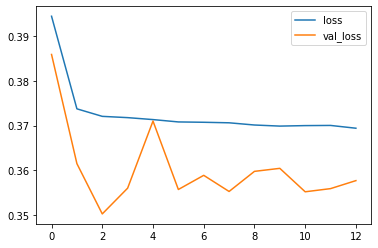

In [226]:
# Plot the loss of the model
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [227]:
y_pred_resample = model.predict_classes(X_test)

# evaluate the model
print(classification_report(y_test,y_pred_resample))
print()
print(confusion_matrix(y_test,y_pred_resample))

              precision    recall  f1-score   support

           0       0.50      0.78      0.61     25739
           1       0.94      0.81      0.87    104951

    accuracy                           0.81    130690
   macro avg       0.72      0.80      0.74    130690
weighted avg       0.85      0.81      0.82    130690


[[20170  5569]
 [19901 85050]]


We get a better precision and 'f1-score' for the minority 

## Try a Random forest model

In [124]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier(n_estimators=10).fit(X_train,y_train)

In [126]:
# predict
y_pred_rfc = rfc_model.predict(X_test)

In [127]:
# evaluate the model
print(classification_report(y_test,y_pred_rfc))
print()
print(confusion_matrix(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.75      0.54      0.63     25739
           1       0.89      0.96      0.92    104951

    accuracy                           0.87    130690
   macro avg       0.82      0.75      0.77    130690
weighted avg       0.87      0.87      0.87    130690


[[ 13813  11926]
 [  4626 100325]]


- The RF model get a better precision but a lower 'recall' for the minority 

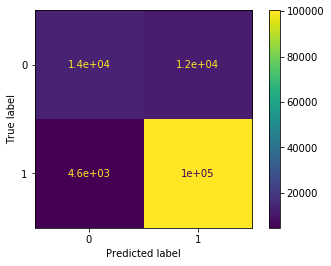

In [219]:
plot_confusion_matrix(rfc_model, X_test, y_test)

In [133]:
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test, y_pred_rfc)

auc_rfc = auc(fpr_rfc, tpr_rfc)

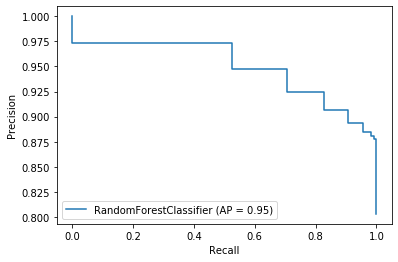

In [220]:
plot_precision_recall_curve(rfc_model,X_test,y_test)

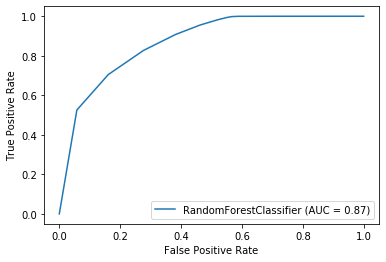

In [231]:
plot_roc_curve(rfc_model,X_test,y_test)